#Restaurant Sales Dataset

Here we have the sales data of resfatrant company from different citie (countries)

In [68]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#importing datasets
df = pd.read_csv(r"C:\Users\subha\Downloads\python dataset\sales_Data_sales.csv")


In [70]:
df.isnull().sum()

Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64

In [71]:
df.Manager.unique

<bound method Series.unique of 0        Tom      Jackson
1             Pablo Perez
2           Joao    Silva
3           Walter Muller
4           Walter Muller
              ...        
249         Walter Muller
250         Walter Muller
251         Walter Muller
252         Walter Muller
253         Walter Muller
Name: Manager, Length: 254, dtype: object>

In [72]:
df.Manager.nunique() # checking the number of unique values its 14 

14

In [73]:
df.dtypes

Order ID            int64
Date               object
Product            object
Price             float64
Quantity          float64
Purchase Type      object
Payment Method     object
Manager            object
City               object
dtype: object

In [74]:
df["Manager"]=df["Manager"].astype(str)           #changing the manager column's datatype

In [75]:
df.dtypes

Order ID            int64
Date               object
Product            object
Price             float64
Quantity          float64
Purchase Type      object
Payment Method     object
Manager            object
City               object
dtype: object

In [76]:
df["Manager"] = df["Manager"].astype(str) \
    .str.strip() \
    .str.replace(r'\s+', ' ', regex=True) \
    .str.title()                                     #removing the space between the namess


In [77]:
df['Manager'].unique() 

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [78]:
df['Manager'].nunique()  #no of unique values now its 5 only 

5

In [79]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
249    False
250    False
251    False
252    False
253    False
Length: 254, dtype: bool

checking duplicates

In [80]:
df[df.duplicated()]                       # there is no duplicates


,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City


In [81]:
df.Quantity

0      573.07
1      745.76
2      200.40
3      569.67
4      201.01
        ...  
249    200.40
250    754.43
251    281.41
252    630.37
253    677.97
Name: Quantity, Length: 254, dtype: float64

In [82]:
df.Quantity = df.Quantity.round() #rounding the values

In [83]:
df.Quantity

0      573.0
1      746.0
2      200.0
3      570.0
4      201.0
       ...  
249    200.0
250    754.0
251    281.0
252    630.0
253    678.0
Name: Quantity, Length: 254, dtype: float64

In [84]:
df.Quantity  = df.Quantity.astype(int) #changing the data type

In [18]:
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,11/7/2022,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,11/7/2022,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid
2,10454,11/7/2022,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,11/8/2022,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin
4,10456,11/8/2022,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,12/28/2022,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,12/29/2022,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,12/29/2022,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,12/29/2022,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin


In [85]:
df.Date = pd.to_datetime(df.Date)  #converting into date and time


In [86]:
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-11-08,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin


Analyzing the data


Q1.)Most Preferred payment method

In [87]:
df["Payment Method"].unique()

array([' Gift Card', ' Credit Card', ' Cash'], dtype=object)

In [88]:
df["Payment Method"].nunique()

3

<Axes: xlabel='Payment Method'>

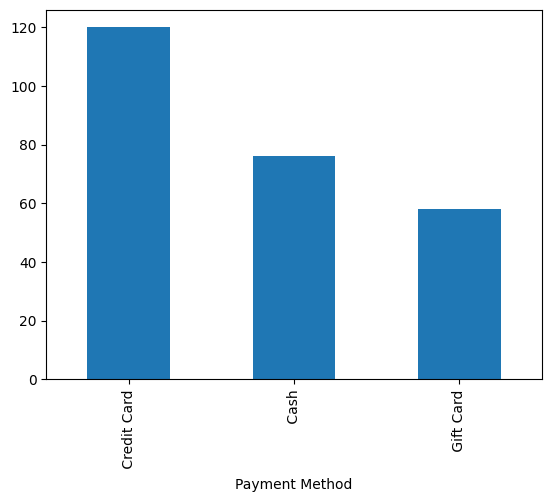

In [89]:
df["Payment Method"].value_counts().plot(kind='bar')

In [90]:
payment_data  = df["Payment Method"].value_counts()

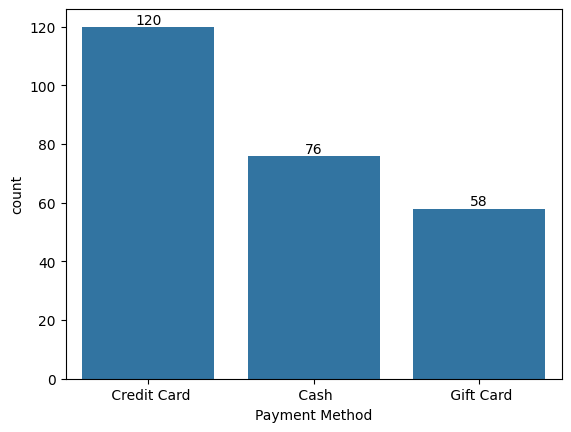

In [91]:
ax = sns.barplot(data=payment_data)

for bars in ax.containers:
    ax.bar_label(bars)

Making the visual looks more attractive

C:\Users\subha\AppData\Local\Temp\ipykernel_19860\4273644617.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=payment_data,palette=colors,width=0.5)


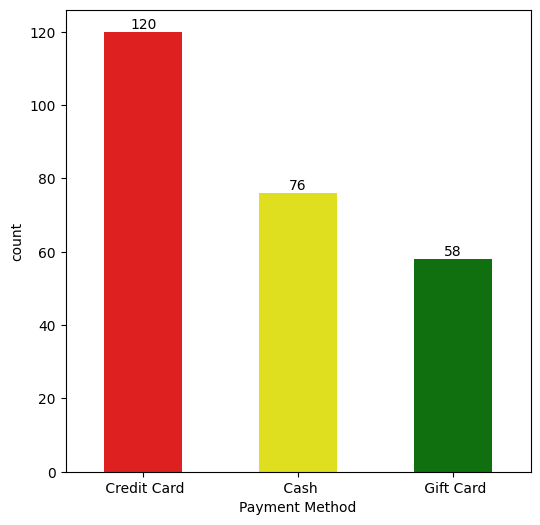

In [92]:
colors = ["#FF0000", "#FFFF00", "#008000"]

plt.figure(figsize=(6, 6))

ax = sns.barplot(data=payment_data,palette=colors,width=0.5)

for bars in ax.containers:
    ax.bar_label(bars)




Q2.) Most selling products 
   By Quantity
   By Revenue

In [27]:
df.head(5)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-11-08,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin


In [93]:
sold_by_quantity =df.groupby("Product")["Quantity"].sum()

In [94]:
sold_by_quantity =df.groupby("Product")["Quantity"].sum().sort_values(ascending=False)

In [95]:
sold_by_quantity

Product
Beverages             34988
Fries                 32023
Burgers               29018
Chicken Sandwiches    11133
Sides & Other          9800
Name: Quantity, dtype: int64

C:\Users\subha\AppData\Local\Temp\ipykernel_19860\3270697385.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sold_by_quantity,palette=colors,width=0.5)


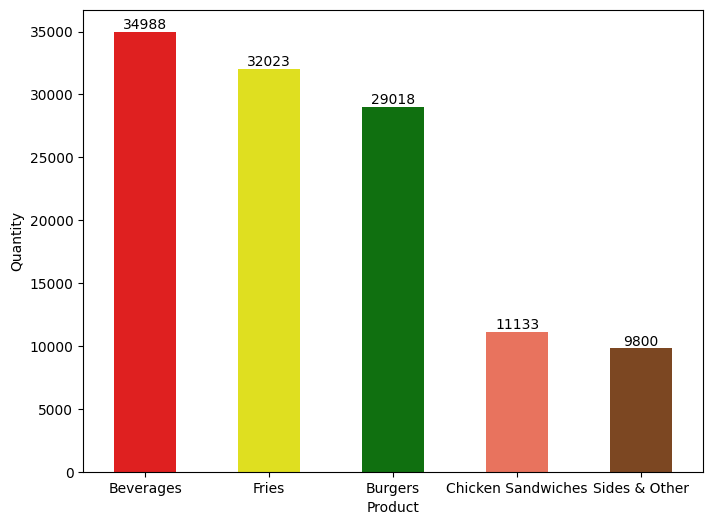

In [96]:
colors = ["#FF0000", "#FFFF00", "#008000","#FF6347","#8B4513"]

plt.figure(figsize=(8, 6))

ax = sns.barplot(data=sold_by_quantity,palette=colors,width=0.5)

for bars in ax.containers:
    ax.bar_label(bars)




In [32]:
#Most sold product according to Quantity

Revenue wise

In [97]:
df["Revenue"] =df["Price"]*df["Quantity"]  #making a revenue column

In [34]:
df.head(5)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-11-08,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,7404.30
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95


In [98]:
revenue_wise = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)
revenue_wise

Product
Burgers               376943.82
Fries                 125626.57
Chicken Sandwiches    114612.45
Beverages             103214.60
Sides & Other          48902.00
Name: Revenue, dtype: float64

<Axes: xlabel='Product'>

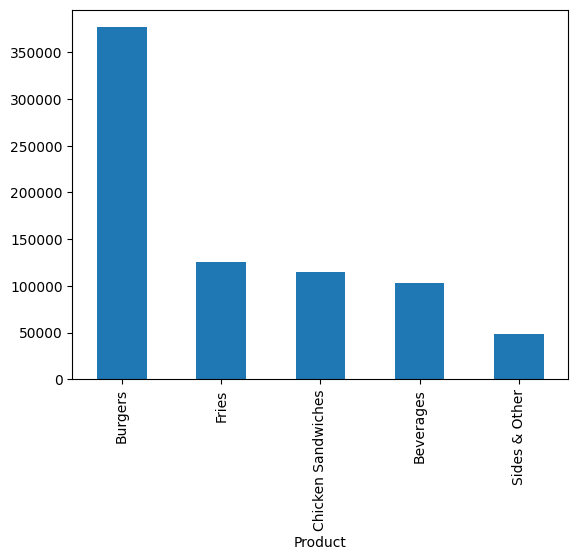

In [99]:
revenue_wise.plot(kind="bar") 

C:\Users\subha\AppData\Local\Temp\ipykernel_19860\2651604664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=revenue_wise,palette=colors,width=0.5)


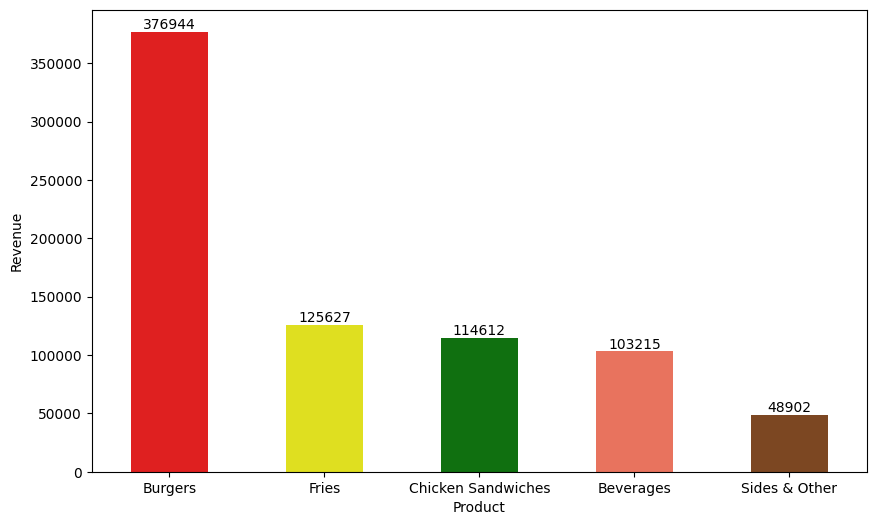

In [100]:
colors = ["#FF0000", "#FFFF00", "#008000","#FF6347","#8B4513"]

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=revenue_wise,palette=colors,width=0.5)

for bars in ax.containers:
    ax.bar_label(bars)



In [101]:
#Burgers Generated the most revenues

Q3.) Which City Manager had Most Revenue 

In [102]:
df.City.unique()

array(['London', 'Madrid', 'Lisbon', 'Berlin', 'Paris'], dtype=object)

In [103]:
city = df.groupby("City")["Revenue"].sum().sort_values(ascending=False)

<Axes: xlabel='City'>

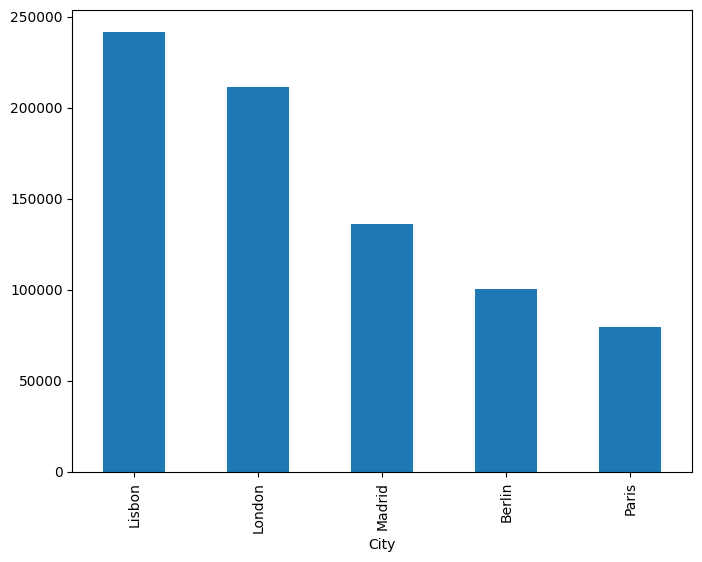

In [104]:
plt.figure(figsize=(8,6))
city.plot(kind='bar')

In [105]:
#As we can see here Lisbon has the most generated revenue

C:\Users\subha\AppData\Local\Temp\ipykernel_19860\2425863429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=city,palette=colors,width=0.5)


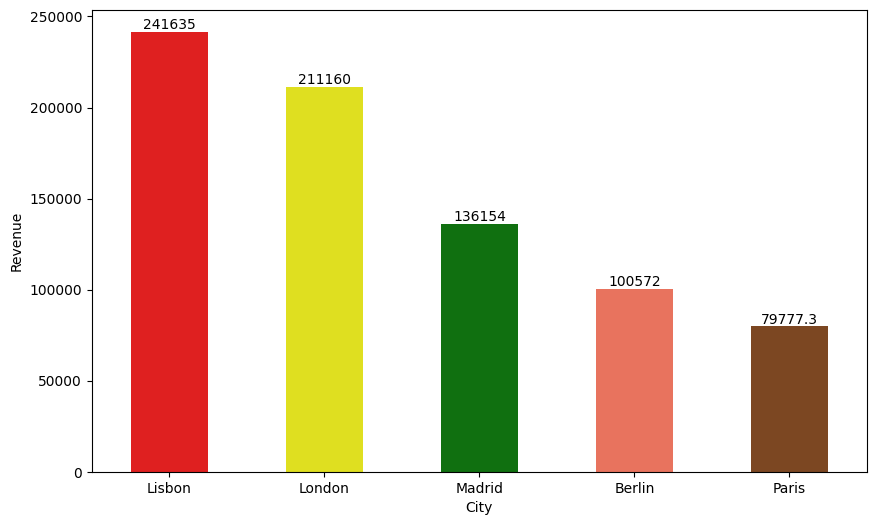

In [106]:
colors = ["#FF0000", "#FFFF00", "#008000","#FF6347","#8B4513"]

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=city,palette=colors,width=0.5)

for bars in ax.containers:
    ax.bar_label(bars)



Q4.)Which manager has the most revenue

In [107]:
Managers = df.groupby("Manager")["Revenue"].sum().sort_values(ascending=False)

C:\Users\subha\AppData\Local\Temp\ipykernel_19860\1260695995.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=Managers,palette=colors,width=0.5)


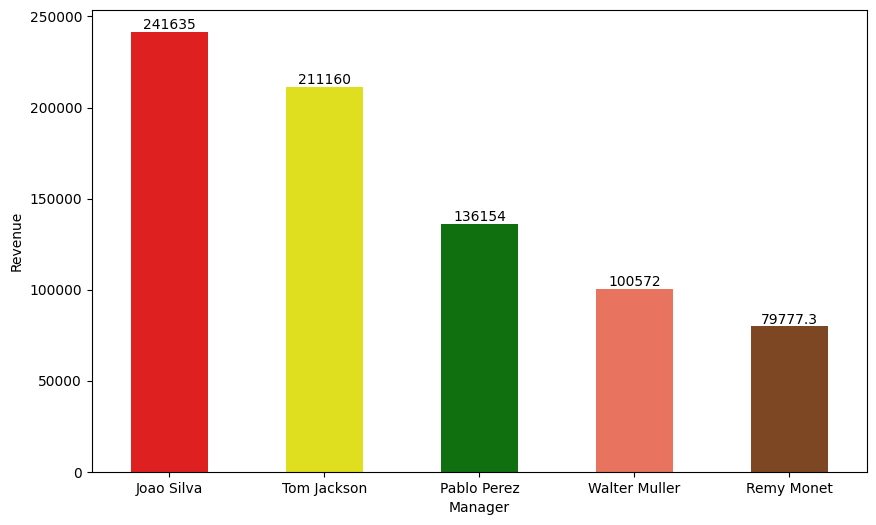

In [108]:
colors = ["#FF0000", "#FFFF00", "#008000","#FF6347","#8B4513"]

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=Managers,palette=colors,width=0.5)

for bars in ax.containers:
    ax.bar_label(bars)

In [109]:
#If we want to know manager wise it will be Joao Silva

Q5.)Date wise Revenue

In [110]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-11-08,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,7404.30
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95


In [48]:
df.dtypes

Order ID                   int64
Date              datetime64[ns]
Product                   object
Price                    float64
Quantity                   int64
Purchase Type             object
Payment Method            object
Manager                   object
City                      object
Revenue                  float64
dtype: object

<Axes: xlabel='Date'>

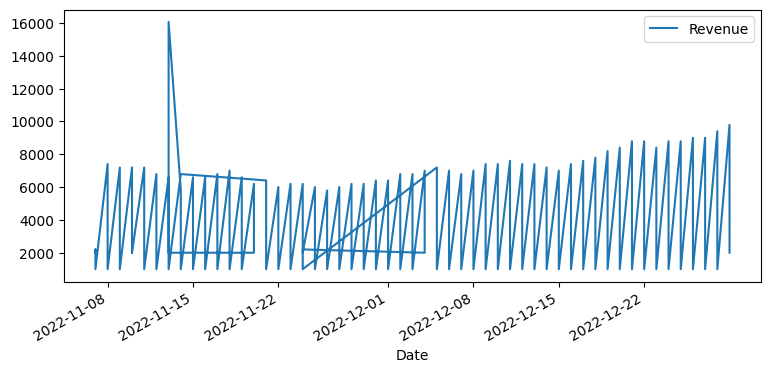

In [111]:
df.plot('Date','Revenue',figsize=(9,4))

Q6.)Average Revenue

In [112]:
float(df['Revenue'].mean())

3028.737952755905

Q7.)Average Revenue of November and December

In [113]:
#firstly we have to create a month column because we dont have one
df['Month'] =df.Date.dt.month

In [52]:
df.head() #month column successfully added

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,7404.30,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11


In [114]:
#revenue of november
m11 = df[df['Month']==11]
m11.head()


,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,7404.30,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11


In [115]:
float(m11.Revenue.mean())

2938.1869026548666

In [116]:
#revenue of december
m12 = df[df['Month']==12]
m12.head()


,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
110,10570,2022-12-01,Burgers,12.99,493,Online,Credit Card,Tom Jackson,London,6404.07,12
111,10571,2022-12-01,Chicken Sandwiches,9.95,201,Online,Credit Card,Tom Jackson,London,1999.95,12
112,10572,2022-12-01,Fries,3.49,573,Online,Credit Card,Remy Monet,Paris,1999.77,12
113,10573,2022-12-01,Beverages,2.95,678,Online,Credit Card,Remy Monet,Paris,2000.10,12
114,10574,2022-12-01,Sides & Other,4.99,200,Online,Credit Card,Remy Monet,Paris,998.00,12


In [117]:
float(m12.Revenue.mean())

3101.3072340425533

Q8.)Standard Deviation of Revenue and Quantity


In [118]:
float(df['Quantity'].std())

214.9794309636385

In [119]:
float(df['Revenue'].std())

2419.9325462715055

Q9.)Variance of Revenue and Quantity

In [120]:
float(df['Revenue'].var())

5856073.528504091

In [121]:
float(df['Quantity'].var())

46216.15573744981

Q10.)Average  'Quantity sold'&'Revenue'  for each product

In [122]:
df.groupby('Product')['Quantity','Revenue'].agg({'Quantity':'mean','Revenue':'mean'})

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [66]:
df.dtypes

Order ID                   int64
Date              datetime64[ns]
Product                   object
Price                    float64
Quantity                   int64
Purchase Type             object
Payment Method            object
Manager                   object
City                      object
Revenue                  float64
Month                      int32
dtype: object